# Project

In [1]:
# Prediction of spam on Spam-Ham dataset using Naive Bayes algorithm.

# Introduction

In [2]:
# The spam-ham dataset consists of five thousand one hundred seventy one samples.
# Each sample include a Number,Label,text and Label_number. 

# Problem Domain

In [3]:
# we have Csv file of Spam dataset and now we see There are  features in dataset 
# which is in numerical form and 1 label which is in categorical (string) form
# so we use Supervised machine learning for better prediction our model.
# our model doesn't take string format so we convert string format to numerical format

# Solution Domain

In [4]:
# For spam dataset we use Naive Bayes classifier
# Naive Bayes algorithm is used for classification problems.
# It is highly used in text classification.
# In text classification tasks, data contains high dimension (as each word represent one feature in the data).
# It is used in spam filtering, sentiment detection, rating classification etc. 
# The advantage of using naïve Bayes is its speed. It is fast and making prediction is easy with high dimension of data.
# This model predicts the probability of an instance belongs to a class with a given set of feature value.
# It is a probabilistic classifier. 
# It is because it assumes that one feature in the model is independent of existence of another feature.
# It uses Bayes theorem in the algorithm for training and prediction.

# Technology Used

In [5]:
# We used Jupyter Notebook for Iris dataset algorithm and also used diffent types of library from python such as numpy, pandas 
# ,matplotlib, seaborn and Scikit-Learn.

# Mathematical Formula

In [6]:
# Bayes’ Theorem finds the probability of an event occurring given the probability of another event that has already occurred.
# Bayes’ theorem is stated mathematically as the following equation:
#    P(A∣B)=P(B∣A)P(A)P(B)P(A∣B)=P(B)P(B∣A)P(A)

#    where A and B are events and P(B) ≠ 0

#    Basically, we are trying to find probability of event A, given the event B is true. 
#    Event B is also termed as evidence.
#    P(A) is the priori of A (the prior probability, i.e. Probability of event before evidence is seen). 
#    The evidence is an attribute value of an unknown instance(here, it is event B).
#    P(B) is Marginal Probability: Probability of Evidence.
#    P(A|B) is a posteriori probability of B, i.e. probability of event after evidence is seen.
#    P(B|A) is Likelihood probability i.e the likelihood that a hypothesis will come true based on the evidence.

# Existing Solutions

# Importing and preperation of data

# Import libraries

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB  
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load dataset

In [8]:
# import dataset
mail_data=pd.read_csv("D://spam_ham_dataset.csv")
mail_data

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


# Summarize the Dataset

In [9]:
# It gives how many instances (rows) and how many attributes (columns) in the dataset
mail_data.shape

(5171, 4)

In [10]:
# It gives first 5 rows data from datase
mail_data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [11]:
# It gives last 5 rows data from datase
mail_data.tail()

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


In [12]:
# It shows the information of dataset
mail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [13]:
# It describe the dataset
mail_data.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [14]:
# it checks whether null value in the dataset.
# there is no null value in Spam dataset.
mail_data.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [15]:
# Dividing data into features(independent variable) and labels(dependent variable)
X=mail_data["text"]
y=mail_data["label"]

In [16]:
X

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    Subject: calpine daily gas nomination\r\n>\r\n...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: text, Length: 5171, dtype: object

In [17]:
y

0        ham
1        ham
2        ham
3       spam
4        ham
        ... 
5166     ham
5167     ham
5168     ham
5169     ham
5170    spam
Name: label, Length: 5171, dtype: object

# Data visualisation

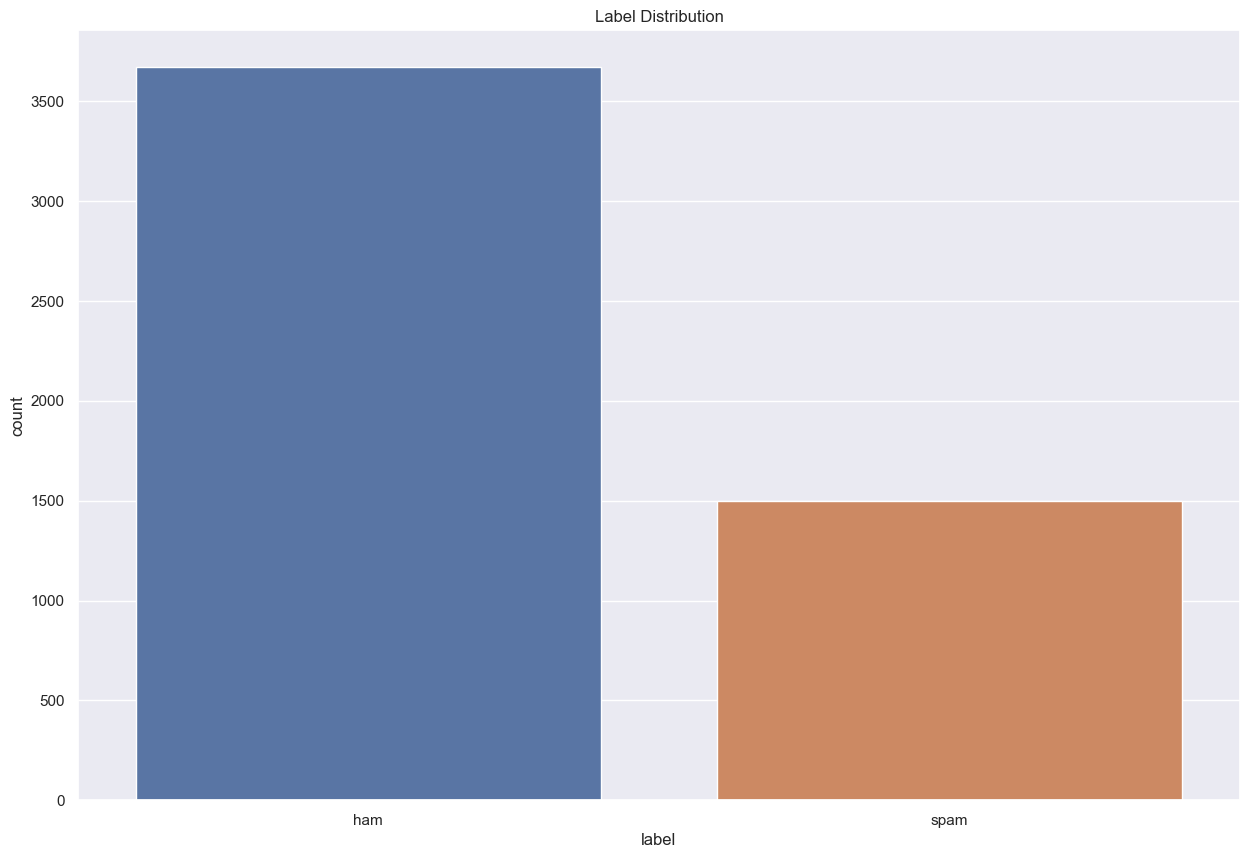

In [38]:
plt.figure(figsize=(15, 10))
sns.countplot(x='label', data=mail_data)
plt.title('Label Distribution')
plt.show()

In [19]:
mail= mail_data['label'].value_counts()
mail

label
ham     3672
spam    1499
Name: count, dtype: int64

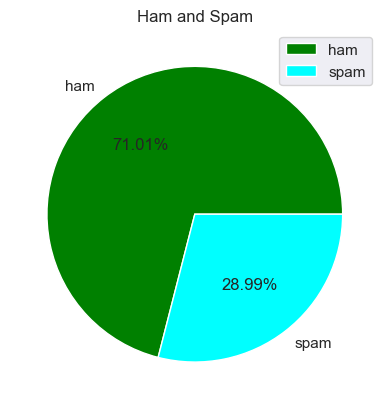

In [37]:
plt.pie(mail, labels=['ham', 'spam'] ,autopct='%.2f%%', colors=['green','cyan'])
plt.legend()
plt.title('Ham and Spam')
plt.show()

C:\Users\megha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


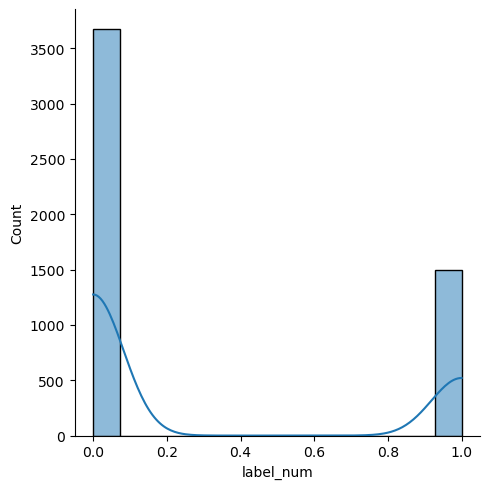

In [21]:
sns.displot(mail_data['label_num'],kde=True)
plt.show()

In [22]:
mail_data[["label","label_num"]].groupby(["label"], as_index = False).mean().sort_values(by="label_num",ascending = False)

,label,label_num
1,spam,1.0
0,ham,0.0


In [23]:
# In this dataset our dependent vvariable in string form so we use LabelEncoder to convert string into numerical form.
#ham==0
#spam==1
encoder=LabelEncoder()
y=encoder.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 1])

In [24]:
#Feature extraction--- Feature extraction refers to the process of transforming raw data into numerical features that can be processed 
#while preserving the information in the original data set. 
#It yields better results than applying machine learning directly to the raw data.


feature_extraction=TfidfVectorizer(min_df=1,stop_words='english')
X_feature=feature_extraction.fit_transform( X)

In [25]:
print(X_feature)

  (0, 37277)	0.2011097309413472
  (0, 17826)	0.2392098021343849
  (0, 7216)	0.1904342633768622
  (0, 32458)	0.15611810136067314
  (0, 11853)	0.12297449106504706
  (0, 13882)	0.16097016125305302
  (0, 21604)	0.09031870628106299
  (0, 33380)	0.22464796050060742
  (0, 5141)	0.16330305397181255
  (0, 38455)	0.18654788930756974
  (0, 49869)	0.17077874338809632
  (0, 36555)	0.2011097309413472
  (0, 47605)	0.11813966930318913
  (0, 15070)	0.26506114668840103
  (0, 36121)	0.2304064936785402
  (0, 34299)	0.27312912121289434
  (0, 15168)	0.09383338654057037
  (0, 37033)	0.17198604767379225
  (0, 15225)	0.16554063068104793
  (0, 20643)	0.12642883285390433
  (0, 36490)	0.20964545173769655
  (0, 0)	0.10426983213156465
  (0, 31571)	0.14947169013950107
  (0, 21659)	0.20324385893640598
  (0, 33042)	0.14755582683265941
  :	:
  (5170, 40944)	0.043825552681914126
  (5170, 19502)	0.06940047912119972
  (5170, 48113)	0.06743231879609364
  (5170, 5896)	0.07807203338816637
  (5170, 39943)	0.0654536507459819
 

In [26]:
y=y.astype('int')

# Spliting dataset into training set and test set

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_feature, y, test_size=0.25, random_state=0)


((5171,), (3878, 50140), (1293, 50140))

In [ ]:
# it shows the shape of feature ,training data of feature and testing data of feature
X.shape, X_train.shape, X_test.shape

In [28]:
# Initiate learning model 
clf=MultinomialNB()

# Fitting the data into the model
clf.fit(X_feature,y)

MultinomialNB()

In [29]:
# Predicting the train set of dataset
y_pred_train=clf.predict(X_train)
y_pred_train

array([0, 0, 0, ..., 1, 0, 0])

In [30]:
# Predicting the test set of dataset
y_pred_test=clf.predict(X_test)
y_pred_test

array([0, 0, 0, ..., 1, 1, 0])

# Accuracy Score

In [31]:
acc=accuracy_score(y_test,y_pred_test)
print ("Accuracy score of our model is" ,round(acc*100,2))

Accuracy score of our model is 97.22


# Building confusion Matrix

In [32]:
cf=confusion_matrix(y_test,y_pred_test)
cf

array([[922,   1],
       [ 35, 335]], dtype=int64)

# plotting heatmap of confusion matrix

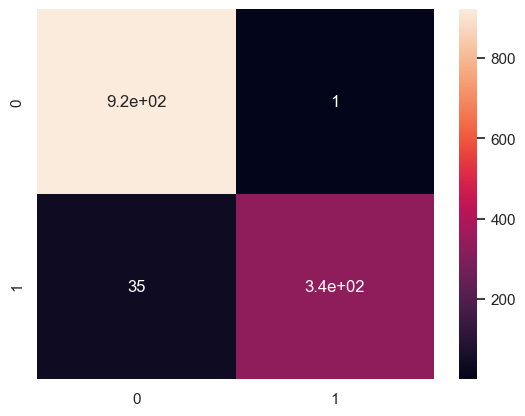

In [33]:
sns.set()
sns.heatmap(cf,annot=True)
plt.show()

# Classification report our model

In [34]:
clr=classification_report(y_test,y_pred_test)
clr

'              precision    recall  f1-score   support\n\n           0       0.96      1.00      0.98       923\n           1       1.00      0.91      0.95       370\n\n    accuracy                           0.97      1293\n   macro avg       0.98      0.95      0.96      1293\nweighted avg       0.97      0.97      0.97      1293\n'

In [35]:
#Evaluating predictions 

input_mail=["enron methanol ; meter # : 988291\
this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\
flow data provided by daren } .\
please override pop ' s daily volume { presently zero } to reflect daily\
activity you can obtain from gas control .\
this change is needed asap for economics purposes ."]
input_mail_feature=feature_extraction.transform(input_mail)   
pre=clf.predict(input_mail_feature)
if(pre[0]==0):
    print("Email is ham")
else:
    print("Email is Spam")

Email is ham


# Conclusion

In [36]:
# For this project, I mainly worked through the Python documentation manuals of the Pandas, 
# Matplotlib and Seaborn modules as well as the Python 3 documentation. 
# There are many resources freely available for learning how to use Python,
# and applying it to analysing datasets such as the Spam dataset. 

# The pandas library is quite intuitive and in a valuable tool in investigating 
# and analysing multi-class multi-variates datasets such as the Spam dataset.

# I looked at the statistical properties of the Spam data set in this project.
# Visualising the data gives a better understanding of the data and what can be done with it.

# The Spam data set is referenced quite a bit in machine learning(Specially for Naive Bayes)
# ,and many resources on the internet use it to demonstrate their product or to teach machine learning methods.

# We used Scikit-Learn library to implement better prediction of model.